# Appendix: Additional Source Listing

<div id="toc"></div>

## A.1 Nudge Subplots

In [3]:
def nudge_subplot(sp, dy):
    """A helper function to move subplots."""
    sp_ax = sp.get_position()
    sp.set_position([sp_ax.x0, sp_ax.y0+dy,
        sp_ax.x1-sp_ax.x0, sp_ax.y1-sp_ax.y0])

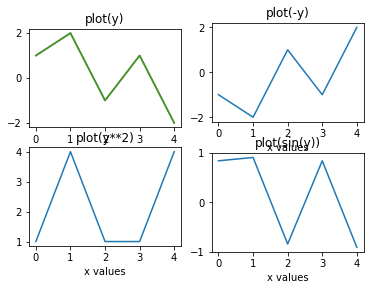

In [4]:
from pylab import *
# values to plot
t = arange(5)
y = array([1, 2, -1, 1, -2])
plot_cmds = [
    "plot(y)",
    "plot(-y)",
    "plot(y**2)",
    "plot(sin(y))"
]
# figure()
for i, plot_cmd in enumerate(plot_cmds):
    sp = subplot(2, 2, i+1)
    if i == 1: nudge_subplot(sp, 0.02)
    if i == 3: nudge_subplot(sp, -0.02)
    exec(plot_cmd)
    title(plot_cmd, fontsize='large')
    xlabel('x values')
show()

## A.2 Magic Square Arrows

In [ ]:
# %load 0053-7-src-Appx/src/magicsq.py
from pylab import *

def magicsq(n=3):
    """Returns a magic square of size n; n must be odd"""

    if n % 2 != 1:
        raise ValueError("Magic(n) requires n to be odd")
    m, row, col = zeros([n, n]), 0, n//2
    for num in range(1, n**2+1):
        m[row, col] = num      # fill the cell
        col = (col+1) % n
        row = (row-1) % n
        if m[row, col]:
            col = (col-1) % n
            row = (row+2) % n
    return m

def testmagicsq(m):
    """Returns True if m is a magic square."""
    msum = sum(m[0, :])
    return all(m.sum(0) == msum) and all(m.sum(1) == msum)

def magic_arrow(x,y,str, n,c, d=0.15):
    my_colors='rgbym'
    mc='k' if c == 'k' else my_colors[c%len(my_colors)]
    if mc == 'y':
        mc = '#dfdf00'
    if str == 'top-right':
        gca().add_patch(Arrow(x+0.5+d,n-y-0.5+d,1-2*d,1-2*d, width=0.2, fc=mc, ec=mc))
    elif str == 'down':
        gca().add_patch(Arrow(x+0.5,n-y-0.5-d, 0, 2*d-1, width=0.2, fc=mc, ec=mc))
    else:
        raise ValueError("Unsupported arrow direction: "+str)

def show_alg(n=3):
    """Draws a magic square, n must be odd"""
    if n % 2 != 1:
        raise ValueError("Magic(n) requires n to be odd")
    if n<1:
        raise ValueError("Magic(n) requires n to be positive")
    axis('scaled')
    axis([0, n, 0, n])
    altc=0
    m, row, col = zeros([n,n]), 0, n//2
    for num in range(1, n**2+1):
        m[row,col] = num
        text(col+0.5,n-row-0.5, '%d' % num, va='center',ha='center')
        pcol,prow = col,row
        col = (col+1) % n
        row = (row-1) % n
        if m[row,col]:
            col = (col-1) % n
            row = (row+2) % n
        if col-pcol == 1 and prow-row == 1:
            magic_arrow(pcol,prow, 'top-right', n,altc)
        elif pcol == col and num != n**2:
            magic_arrow(pcol,prow, 'down', n,'k')
            altc += 1
        elif col-pcol == 1 and prow-row != 1:
            magic_arrow(pcol,prow,'top-right',n,altc)
            magic_arrow(pcol, n,'top-right',n,altc) 
        elif col-pcol != 1 and prow-row == 1:
            magic_arrow(pcol, prow, 'top-right', n, altc)
            magic_arrow(-1, prow, 'top-right', n, altc)
        elif num == n**2:
            pass
        else:
            raise ValueError("Woah")

    for i in range(n):
        plot([0, n], [i, i], 'b')
        plot([i, i], [0, n], 'b')
    xticks([])
    yticks([])
    title('N=%d' % n)
#	savefig('../images/magicsq%03d.png'%n)

def show_some():
    figure()
    for i in range(2):
        subplot(1, 2, i+1); show_alg(2*i+3); title('N = '+str(2*i+3))
        
show_some()
show()


## A.3 Numerical Integration Visualization Source Code

In [ ]:
# %load 0053-7-src-Appx/src/int_circle.py
from pylab import *
N = 1000
x1 = linspace(-1, 1, N)
y1 = sqrt(1-x1**2)
for i, N in enumerate([5, 10, 20, 100]):
    subplot(2, 2, i+1)
    x = linspace(-1, 1, N)
    y = sqrt(1-x**2)
    dx = x[1]-x[0]
    for i in range(len(x)-1):
        gca().add_patch(Rectangle((x[i], 0), dx, 0.5*(y[i]+y[i+1]), \
	        fc='lightblue'))
    axis('equal')
    title('N=%d' % N)
    plot(x1, y1, 'k', lw=1)
show()

In [ ]:
# %load 0053-7-src-Appx/src/int_trapz.py
from pylab import *

figure()
title('Trapezoidal integration')
xlabel('x')
ylabel('y')

# plot the "ideal" circle
N = 1000
x_circle = linspace(-1, 1, N)
y_circle = sqrt(1-x_circle**2)
plot(x_circle, y_circle, 'k', lw=1)

# non-evenly spaced values
x = array([-1, -0.9, -0.4, 0.0, 0.4, 0.9, 1])
y = sqrt(1-x**2)
for i in range(len(x)-1):
    # add trapezoids
    gca().add_patch(Polygon([[x[i], 0], [x[i], y[i]], [x[i+1],y[i+1]], \
        [x[i+1], 0]], fc='lightblue'))
xticks(x)
axis('equal')

show()


## A.4 Fractal Function Source Code

In [ ]:
# %load 0053-7-src-Appx/src/fractal_collage.py
from PIL import Image
from cmath import *

# creates a z**4+1=0 fractal using the Newton-Raphson
# root finding method
delta       = 0.000001    # convergence criteria
res         = 200       # image size
iterations  = range(1,10)  # number of iterations

for iters in iterations:
    # create an image to draw on, paint it black
    img = Image.new("RGB", (res,res), (0,0,0))

    # these are the solutions to the equation z**4+1=0 (Euler's formula)
    solutions = [cos((2*n+1)*pi/4)+1j*sin((2*n+1)*pi/4) for n in range(4)]
    colors = [ (1,0,0), (0,1,0), (0,0,1), (1,1,0) ]

    for re in range(0, res):
        for im in range(0,res):
            z = (re+1j*im)/res
            for i in range(iters):
                try:
                    z = z-(z**4+1)/(4*z**3)
                    if(abs(z**4+1)<delta):
                        break
                except ZeroDivisionError:
                    # possibly divide by zero exception
                    continue

            # color depth is a function of the number of iterations
            color_depth = int((iters-i)*255.0/iters)

            # find to which solution this guess converged to
            err = [ abs(z-root) for root in solutions ]
            distances=zip(err, range(len(colors)))

            # select the color associated with the solution
            color=[ i*color_depth for i in colors[min(distances)[1]]]
            img.putpixel((re,im), tuple(color))

    img.save('../images/fractal_z4s_%03d_%03d_%03d.png' % \
        (iters, res, abs(log10(delta))))
    print('wrote ../images/fractal_z4s_%03d_%03d_%03d.png' % \
        (iters, res, abs(log10(delta))))

collage = Image.new("RGB", (res*3,res*3))
for x in range(3):
    for y in range(3):
        im = Image.open('../images/fractal_z4s_%03d_%d_005.png' % (x*3+y+1, res))
        collage.paste(im, (res*y, res*x))
collage.show()
